### Let's load a Handwritten Digit classifier we'll be building very soon!

In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import load_model

classifier = load_model('D:/development/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

Using TensorFlow backend.
W0728 14:08:27.915999  9760 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 14:08:27.947999  9760 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 14:08:27.974000  9760 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0728 14:08:28.092999  9760 deprecation_wrapper.py:119] From D:\development\anaconda3\envs\dlcv\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0728 14

In [ ]:
classifier.summary()

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} -c anaconda graphviz

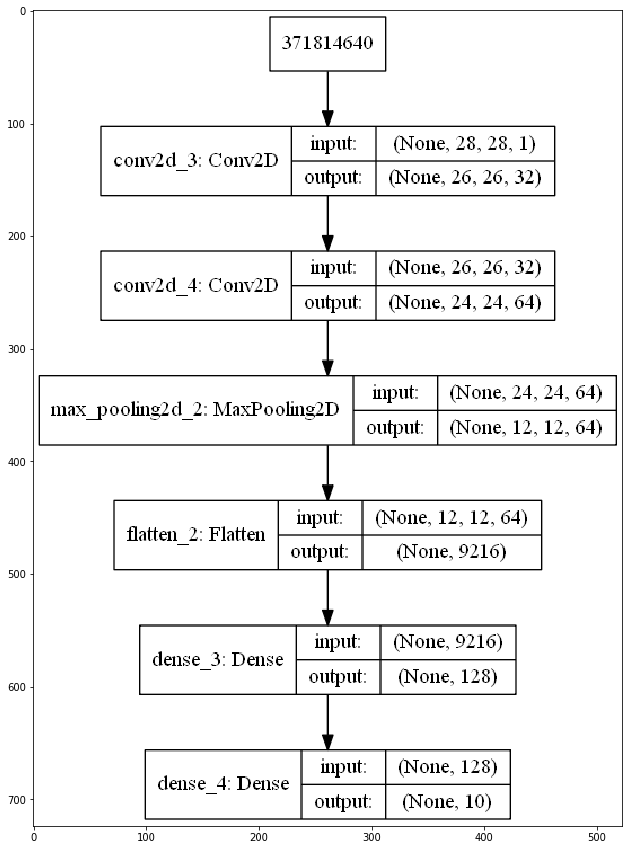

In [2]:
%matplotlib inline
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Save our model diagrams to this path
model_diagrams_path = 'D:\\development\\DeepLearningCV\\Trained Models\\'

# Generate the plot
plot_model(classifier, to_file = model_diagrams_path + 'mnist_simple_cnn.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread(model_diagrams_path + 'mnist_simple_cnn.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 

In [3]:
#import cv2
#import numpy as np
#from keras.datasets import mnist
#from keras.models import load_model

#classifier = load_model('D:/development/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    pred_res=classifier.predict_classes(input_im, 1, verbose = 0)
    res = str(pred_res[0])
    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Testing our classifier on a real image

In [ ]:
import numpy as np
import cv2
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel
       
image = cv2.imread('images/numbers3.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#cv2.imshow("blurred", blurred)
#cv2.waitKey(0)

edged = cv2.Canny(blurred, 30, 150)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)
print(blurred)
print(edged)

In [ ]:
cv2.imshow("edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(len(edged))

In [ ]:

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

In [ ]:

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

### Training this Model

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Training Parameters
batch_size = 128
epochs = 5

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])